In [62]:
import pandas as pd
from sklearn.model_selection import train_test_split
from ucimlrepo import fetch_ucirepo 
import bnlearn as bn
from sklearn.metrics import accuracy_score
import pandas as pd
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.preprocessing import KBinsDiscretizer
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np

In [63]:
# fetch dataset 
dataset = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
Xt = dataset.data.features 
yt = dataset.data.targets 



In [64]:
# Import necessary libraries
df = pd.concat([Xt, yt], axis=1)
df = df.reset_index(drop=True)

divider = KBinsDiscretizer(n_bins=4, encode='ordinal', strategy='uniform')
X_transformed = divider.fit_transform(df.drop('class', axis = 1))



In [65]:
df.columns

Index(['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline', 'class'],
      dtype='object')

In [66]:
df = pd.DataFrame(X_transformed, columns=['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash', 'Magnesium',
       'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'])

df = pd.concat([df, yt], axis=1)
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)


In [67]:
df.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,3.0,0.0,2.0,1.0,2.0,2.0,2.0,1.0,2.0,1.0,1.0,3.0,2.0,1
1,2.0,0.0,1.0,0.0,1.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,2.0,1
2,2.0,1.0,2.0,1.0,1.0,2.0,2.0,1.0,3.0,1.0,1.0,2.0,2.0,1
3,3.0,0.0,2.0,1.0,1.0,3.0,2.0,0.0,2.0,2.0,1.0,3.0,3.0,1
4,2.0,1.0,3.0,2.0,2.0,2.0,1.0,1.0,1.0,1.0,1.0,2.0,1.0,1


In [68]:
df_train = df_train.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 142 entries, 0 to 141
Data columns (total 14 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Alcohol                       142 non-null    float64
 1   Malicacid                     142 non-null    float64
 2   Ash                           142 non-null    float64
 3   Alcalinity_of_ash             142 non-null    float64
 4   Magnesium                     142 non-null    float64
 5   Total_phenols                 142 non-null    float64
 6   Flavanoids                    142 non-null    float64
 7   Nonflavanoid_phenols          142 non-null    float64
 8   Proanthocyanins               142 non-null    float64
 9   Color_intensity               142 non-null    float64
 10  Hue                           142 non-null    float64
 11  0D280_0D315_of_diluted_wines  142 non-null    float64
 12  Proline                       142 non-null    float64
 13  class

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [k2]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


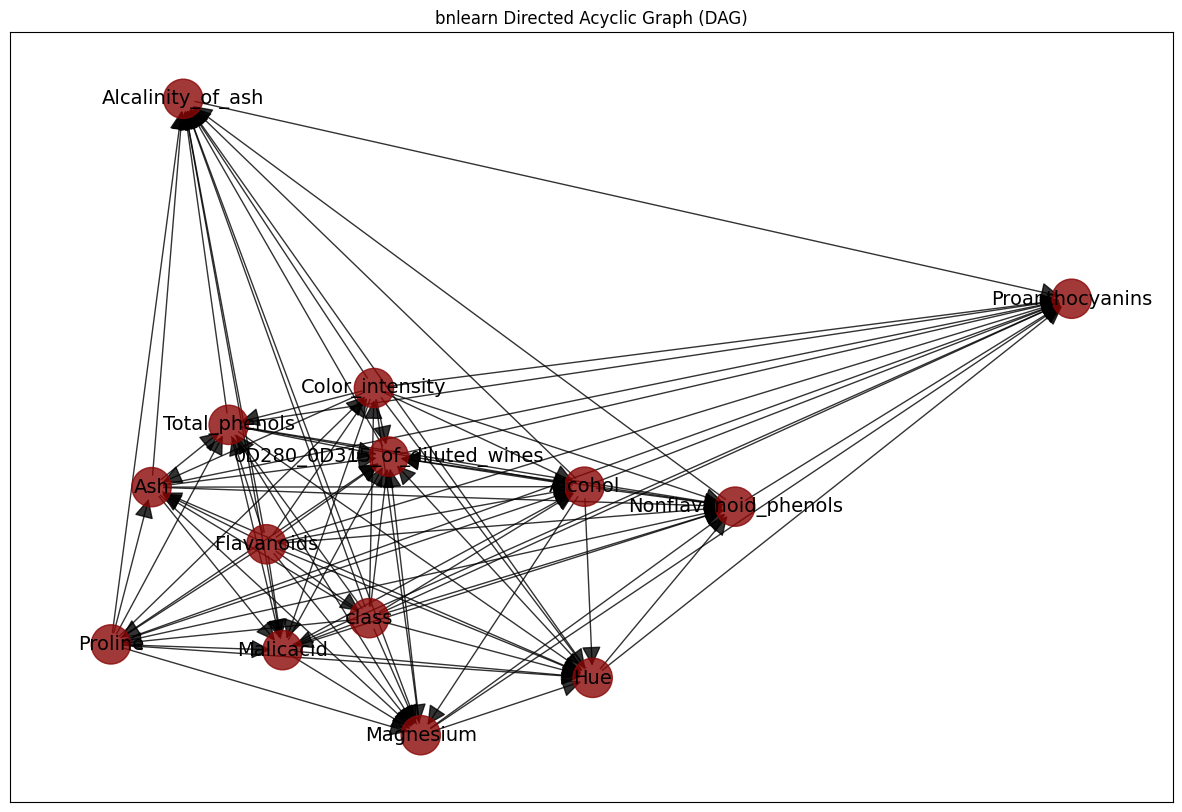

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([0.26206264, 0.03385294]),
  'Malicacid': array([-0.19517014, -0.34568151]),
  'Ash': array([-0.39351873,  0.03274677]),
  'Alcalinity_of_ash': array([-0.34566487,  0.93402561]),
  'Magnesium': array([ 0.01411387, -0.54295629]),
  'Total_phenols': array([-0.2767796 ,  0.17735866]),
  'Flavanoids': array([-0.21960526, -0.09982025]),
  'Nonflavanoid_phenols': array([ 0.49049442, -0.01252852]),
  'Proanthocyanins': array([1.        , 0.47000869]),
  'Color_intensity': array([-0.05670283,  0.26276055]),
  'Hue': array([ 0.27454035, -0.40990175]),
  '0D280_0D315_of_diluted_wines': array([-0.03451481,  0.10373673]),
  'Proline': array([-0.45521803, -0.33227729]),
  'class': array([-0.06403699, -0.27132434])},
 'G': <networkx.classes.digraph.DiGraph at 0x2a2724dc0>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malicacid': {'node_color': '#1f456e

In [69]:
network_A = bn.structure_learning.fit(df_train, methodtype='hc', scoretype='k2')
bn.plot(network_A, node_color='#8A0707')

[bnlearn] >Compute edge strength with [chi_square]
[bnlearn] >Edge [Alcohol <-> Alcalinity_of_ash] [P=0.00114866] is excluded because it was not significant (P<0.00) with [chi_square]
[bnlearn] >Edge [Alcohol <-> 0D280_0D315_of_diluted_wines] [P=0.00535352] is excluded because it was not significant (P<0.00) with [chi_square]
[bnlearn] >Edge [Alcohol <-> Nonflavanoid_phenols] [P=0.607722] is excluded because it was not significant (P<0.00) with [chi_square]
[bnlearn] >Edge [Alcohol <-> Magnesium] [P=0.0284682] is excluded because it was not significant (P<0.00) with [chi_square]
[bnlearn] >Edge [Alcohol <-> Hue] [P=0.54391] is excluded because it was not significant (P<0.00) with [chi_square]
[bnlearn] >Edge [Malicacid <-> Proanthocyanins] [P=0.00134519] is excluded because it was not significant (P<0.00) with [chi_square]
[bnlearn] >Edge [Malicacid <-> Alcalinity_of_ash] [P=0.014752] is excluded because it was not significant (P<0.00) with [chi_square]
[bnlearn] >Edge [Malicacid <-> 0

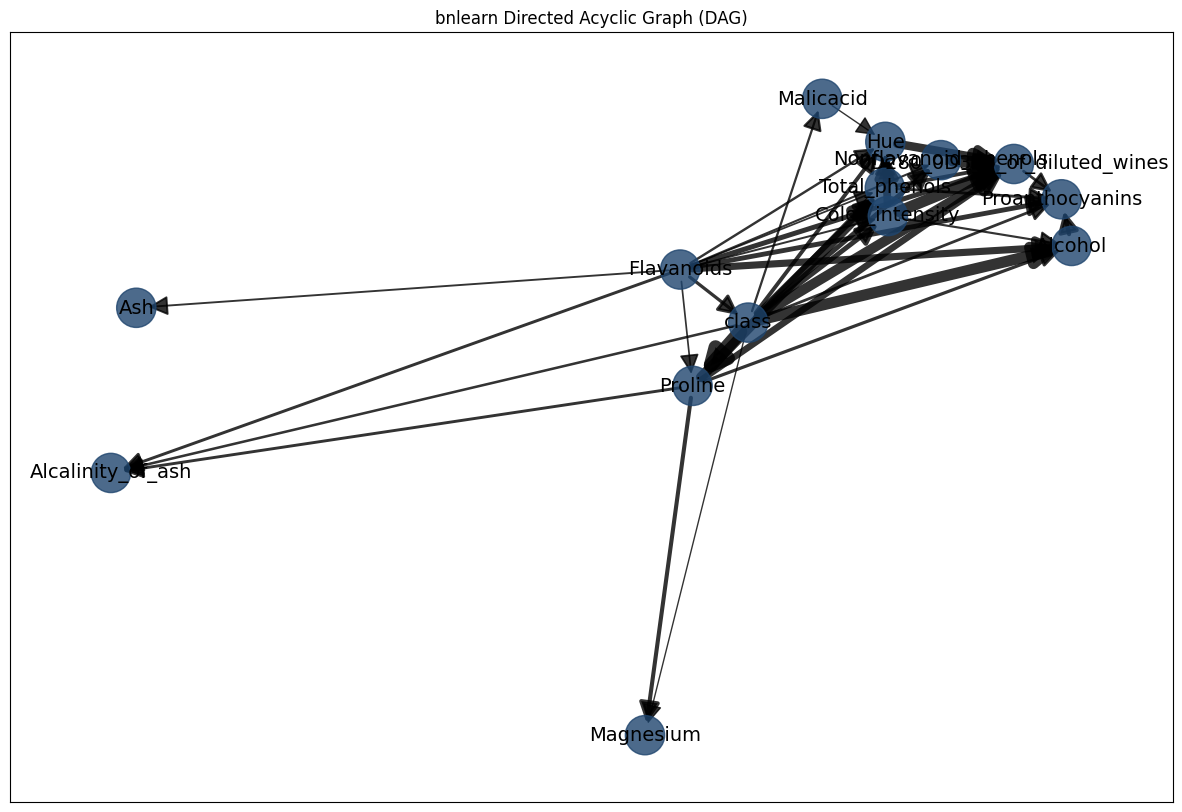

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([0.48968377, 0.07246788]),
  'Malicacid': array([0.10296358, 0.39368099]),
  'Ash': array([-0.96060622, -0.06258274]),
  'Alcalinity_of_ash': array([-1.        , -0.42314653]),
  'Magnesium': array([-0.17182347, -0.99570104]),
  'Total_phenols': array([0.20008751, 0.19923777]),
  'Flavanoids': array([-0.11730658,  0.02093992]),
  'Nonflavanoid_phenols': array([0.28699892, 0.25978689]),
  'Proanthocyanins': array([0.47402707, 0.17427214]),
  'Color_intensity': array([0.20482415, 0.13779571]),
  'Hue': array([0.20082826, 0.29977266]),
  '0D280_0D315_of_diluted_wines': array([0.40013698, 0.25139325]),
  'Proline': array([-0.09806803, -0.2330248 ]),
  'class': array([-0.01174596, -0.0948921 ])},
 'G': <networkx.classes.digraph.DiGraph at 0x4d38f3160>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malicacid': {'node_color': '#1f456e', 'node_siz

In [70]:
network_B = bn.independence_test(network_A, df_train, alpha=0.0001, prune=True)
bn.plot(network_B)

[bnlearn] >Warning: Computing DAG with 14 nodes can take a very long time!
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


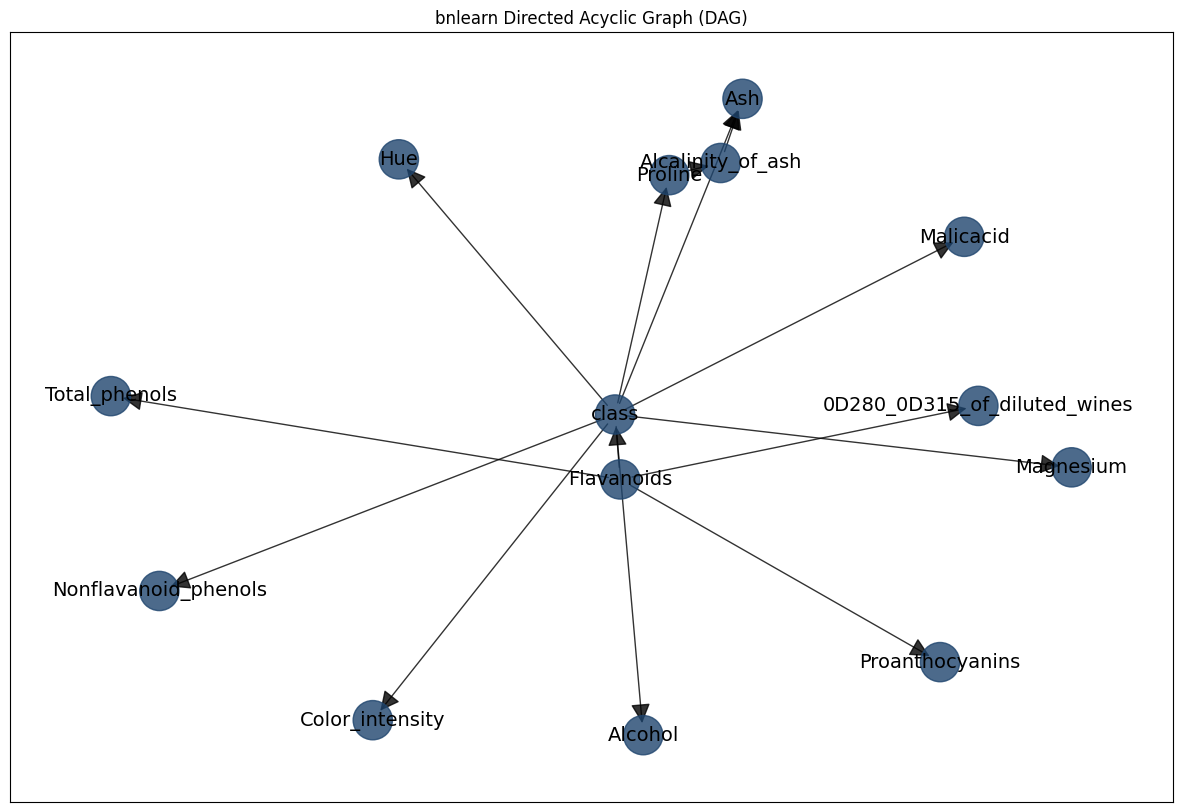

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([-2.82675819e-04, -9.08066419e-01]),
  'Malicacid': array([0.60267396, 0.47298217]),
  'Ash': array([0.18621929, 0.85536735]),
  'Alcalinity_of_ash': array([0.14518496, 0.67753358]),
  'Magnesium': array([ 0.80426808, -0.16586858]),
  'Total_phenols': array([-1.        ,  0.03150986]),
  'Flavanoids': array([-0.04348062, -0.19937852]),
  'Nonflavanoid_phenols': array([-0.90900435, -0.50844315]),
  'Proanthocyanins': array([ 0.55717169, -0.70560863]),
  'Color_intensity': array([-0.50816362, -0.8665113 ]),
  'Hue': array([-0.45920856,  0.6876472 ]),
  '0D280_0D315_of_diluted_wines': array([0.62914645, 0.00444557]),
  'Proline': array([0.04857371, 0.6438455 ]),
  'class': array([-0.0530983 , -0.01945463])},
 'G': <networkx.classes.digraph.DiGraph at 0x4d38f2ec0>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Malicacid': {'node_color': '#1f45

In [71]:
network_A_imp = bn.structure_learning.fit(df_train, methodtype='hc', scoretype='bdeu')
bn.plot(network_A_imp)

Selected Features: Index(['Alcohol', 'Flavanoids', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'],
      dtype='object')
[bnlearn] >Computing best DAG using [hc]
[bnlearn] >Set scoring type at [bdeu]
[bnlearn] >Compute structure scores for model comparison (higher is better).
[bnlearn] >Set node properties.
[bnlearn] >Set edge properties.
[bnlearn] >Plot based on Bayesian model


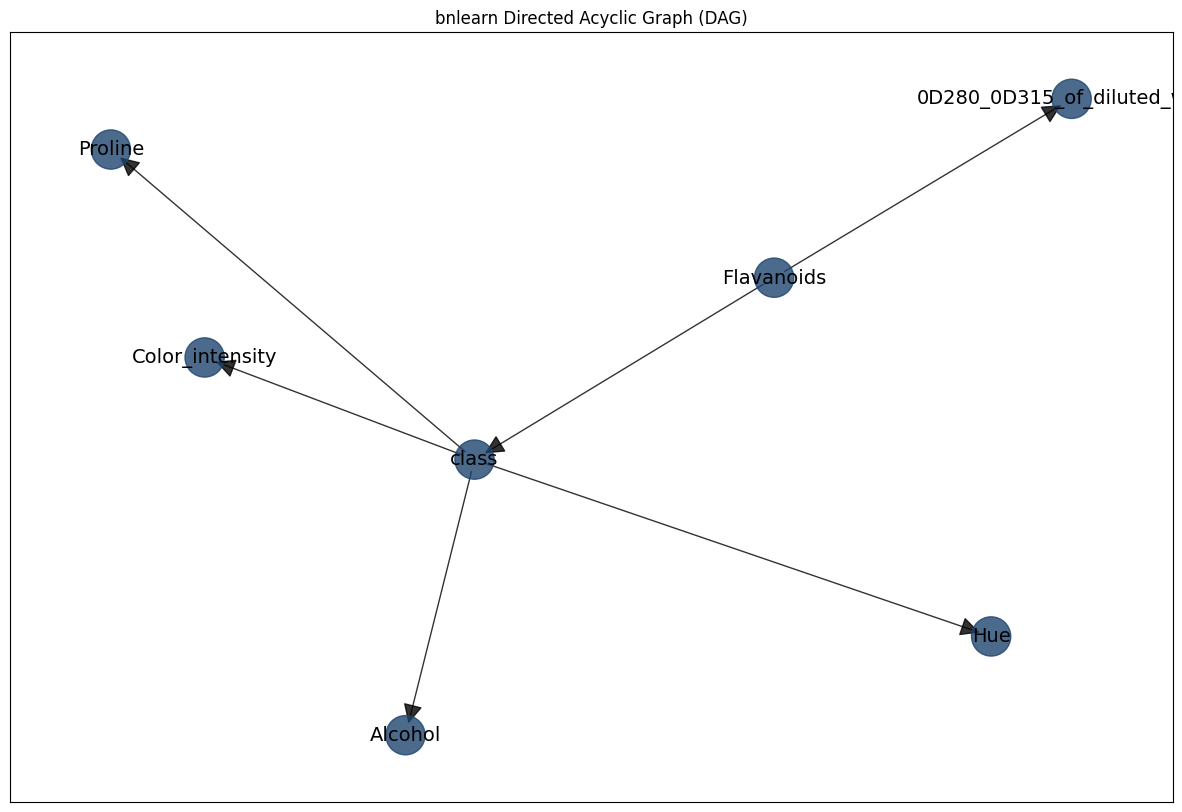

{'fig': <Figure size 1500x1000 with 1 Axes>,
 'ax': <Figure size 1500x1000 with 1 Axes>,
 'pos': {'Alcohol': array([-0.34421674, -0.80523546]),
  'Flavanoids': array([0.3997003, 0.2552647]),
  'Color_intensity': array([-0.7494535 ,  0.07036764]),
  'Hue': array([ 0.8375619 , -0.57632813]),
  '0D280_0D315_of_diluted_wines': array([1.        , 0.66994122]),
  'Proline': array([-0.93866534,  0.55240574]),
  'class': array([-0.20492662, -0.16641572])},
 'G': <networkx.classes.digraph.DiGraph at 0x4d3a1c220>,
 'node_properties': {'Alcohol': {'node_color': '#1f456e', 'node_size': 800},
  'Flavanoids': {'node_color': '#1f456e', 'node_size': 800},
  'Color_intensity': {'node_color': '#1f456e', 'node_size': 800},
  'Hue': {'node_color': '#1f456e', 'node_size': 800},
  '0D280_0D315_of_diluted_wines': {'node_color': '#1f456e', 'node_size': 800},
  'Proline': {'node_color': '#1f456e', 'node_size': 800},
  'class': {'node_color': '#1f456e', 'node_size': 800}},
 'edge_properties': {('Flavanoids',
  

In [94]:

# Feature selection
X = df_train.drop('class', axis=1)
y = df_train['class']

X_test = df_test.drop('class', axis=1)
y_test = df_test['class']

k_best = SelectKBest(f_classif, k=6).fit(X, y)
X_new = k_best.transform(X)

selected_indices = k_best.get_support(indices=True)
selected_features = X.columns[selected_indices]
print("Selected Features:", selected_features)

X_test_new = k_best.transform(X_test)
# Constructing network on selected features
df_new = pd.DataFrame(X_new, columns=selected_features)
df_new['class'] = y

df_test_new = pd.DataFrame(X_test_new, columns=selected_features)
df_test_new['class'] = y_test

network_C = bn.structure_learning.fit(df_new, methodtype='hc', scoretype='bdeu')

# Visualize the network
bn.plot(network_C)



In [95]:
print(len(network_A['model_edges']),len(network_A_imp['model_edges']),len(network_B['model_edges']),len(network_C['model_edges']))


91 14 38 6


In [96]:
# network_A_para = bn.parameter_learning.fit(network_A, df_train, verbose=3)
network_A_imp_para = bn.parameter_learning.fit(network_A_imp, df_train, verbose=3)
network_B_para = bn.parameter_learning.fit(network_B, df_train, verbose=3)
network_C_para = bn.parameter_learning.fit(network_C, df_new, verbose=3)




[bnlearn] >Parameter learning> Computing parameters using [bayes]
[bnlearn] >Converting [<class 'pgmpy.base.DAG.DAG'>] to BayesianNetwork model.
[bnlearn] >Converting adjmat to BayesianNetwork.
[bnlearn] >CPD of Alcalinity_of_ash:
+------------------------+-----+---------------------+
| Proline                | ... | Proline(3.0)        |
+------------------------+-----+---------------------+
| Alcalinity_of_ash(0.0) | ... | 0.2529411764705882  |
+------------------------+-----+---------------------+
| Alcalinity_of_ash(1.0) | ... | 0.2568627450980392  |
+------------------------+-----+---------------------+
| Alcalinity_of_ash(2.0) | ... | 0.24509803921568626 |
+------------------------+-----+---------------------+
| Alcalinity_of_ash(3.0) | ... | 0.24509803921568626 |
+------------------------+-----+---------------------+
[bnlearn] >CPD of Ash:
+-------------------+-----+------------------------+
| Alcalinity_of_ash | ... | Alcalinity_of_ash(3.0) |
+-------------------+-----+--------

In [97]:
CPDs = bn.print_CPD(network_C_para)


[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+--------------+----------+
|    |   Flavanoids |        p |
+====+==============+==========+
|  0 |            0 | 0.262697 |
+----+--------------+----------+
|  1 |            1 | 0.264448 |
+----+--------------+----------+
|  2 |            2 | 0.253065 |
+----+--------------+----------+
|  3 |            3 | 0.21979  |
+----+--------------+----------+
CPD of Flavanoids:
+-----------------+----------+
| Flavanoids(0.0) | 0.262697 |
+-----------------+----------+
| Flavanoids(1.0) | 0.264448 |
+-----------------+----------+
| Flavanoids(2.0) | 0.253065 |
+-----------------+----------+
| Flavanoids(3.0) | 0.21979  |
+-----------------+----------+
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+--------------------------------+--------------+----------+
|    |   0D280_0D315_of_diluted_wines |   Flavanoids |        p |
+

In [98]:
CPDs['class']


,class,Flavanoids,p
0,1,0.0,0.277778
1,1,1.0,0.322296
2,1,2.0,0.395617
3,1,3.0,0.332005
4,2,0.0,0.311111
5,2,1.0,0.401766
6,2,2.0,0.316032
7,2,3.0,0.335989
8,3,0.0,0.411111
9,3,1.0,0.275938


Text(0.5, 0.92, '3D Scatter Plot')

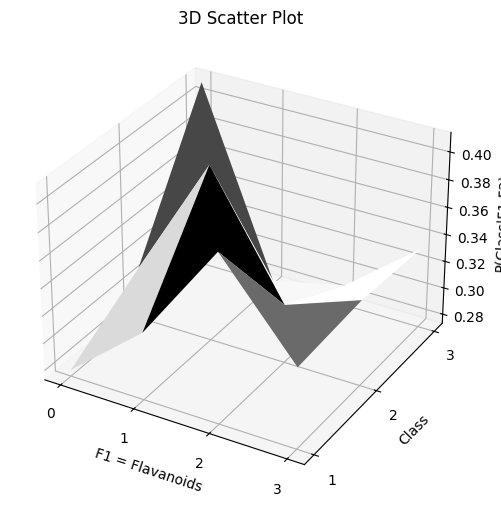

In [99]:

import numpy as np
X, Y = np.meshgrid([0,1,2,3],[1,2,3])

P = np.zeros((3,4))
count = 0
for i in range(3):
    for j in range(4):
        P[i,j] = CPDs['class']['p'][count]
        count+=1



fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(X, Y, P, cmap = 'Greys')
ax.set_xticks([0,1,2,3])
ax.set_yticks([1,2,3])
ax.set_xlabel('F1 = Flavanoids')
ax.set_ylabel('Class')
ax.set_zlabel('P(Class|F1,F2)')
ax.set_title('3D Scatter Plot')


In [100]:
df_test.head()

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,2.0,1.0,2.0,0.0,2.0,2.0,2.0,0.0,1.0,1.0,1.0,3.0,1.0,1
1,3.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,1.0,3.0,2.0,1
2,2.0,1.0,2.0,2.0,1.0,0.0,0.0,3.0,0.0,1.0,0.0,1.0,0.0,3
3,2.0,0.0,2.0,2.0,1.0,2.0,2.0,1.0,2.0,1.0,2.0,2.0,2.0,1
4,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.0,1.0,2.0,3.0,0.0,2


In [101]:
q1 = bn.inference.fit(network_A_imp_para, variables=['class'], evidence={'Malicacid' : 1, 'Flavanoids' : 2})
q2 = bn.inference.fit(network_A_imp_para, variables=['class'], evidence={'Alcohol' : 2, 'Flavanoids' : 0})
q3 = bn.inference.fit(network_A_imp_para, variables=['class'], evidence={'Malicacid' : 0, 'Flavanoids' : 2, 'Total_phenols' : 2})
q4 = bn.inference.fit(network_A_imp_para, variables=['class'], evidence={'Malicacid' : 0, 'Flavanoids' : 1, 'Magnesium':0})

[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.380019 |
+----+---------+----------+
|  1 |       2 | 0.317295 |
+----+---------+----------+
|  2 |       3 | 0.302686 |
+----+---------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0 |       1 | 0.30524  |
+----+---------+----------+
|  1 |       2 | 0.274297 |
+----+---------+----------+
|  2 |       3 | 0.420462 |
+----+---------+----------+
[bnlearn] >Variable Elimination.
[bnlearn] >Warning: variable(s) [None] does not exists in DAG.
[bnlearn] >Data is stored in [query.df]
+----+---------+----------+
|    |   class |        p |
+====+=========+==========+
|  0

In [102]:
prediction_C = bn.predict(network_C_para, df_test_new, variables=['class'])
prediction_A_imp = bn.predict(network_A_imp_para, df_test, variables=['class'])
prediction_B = bn.predict(network_B_para, df_test, variables=['class'])



[bnlearn]> Remaining columns for inference: 6


100%|██████████| 29/29 [00:00<00:00, 1701.47it/s]


[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 1046.76it/s]


[bnlearn]> Remaining columns for inference: 13


100%|██████████| 36/36 [00:00<00:00, 1032.67it/s]


In [103]:
print(accuracy_score(y_test,prediction_A_imp['class'].values), accuracy_score(y_test,prediction_B['class'].values), accuracy_score(y_test,prediction_C['class'].values))


0.9166666666666666 0.8611111111111112 0.9444444444444444


0.9577464788732394 1.0 0.9929577464788732
